<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/raw/master/imgs/banner_IA.png"  width="1000px" height="200px">

# **Parcial 01 - IA**

## **Outline**

1. [Ejercicio 1. Numpy](#eje1)
2. [Ejercicio 2. Pandas](#eje2)
3. [Ejercicio 3. Pandas - estadistica](#eje3)
4. [Ejercicio 4. estadistica](#eje4)

In [17]:
#@title 1. MONTAR EL DRIVE **student** { display-mode: "form" }
quiz = "quiz01" #@param {type:"string"}
import os
from google.colab import drive
drive.mount('/content/drive')

path = '/content/drive/My Drive/'+quiz
os.chdir(path)
print(os.getcwd())
!chmod 777 convert_ipynb.sh run utils/*

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/quiz01


---
#### Usted debe ejecutar **TODAS** las celdas de tipo **CODE**. De lo contrario, sus respuestas no serán procesadas correctamente.
---

# **Ejercicio 1**  <a name="eje1"></a>

Contruya una función, que retorne una matriz $N \times N$ validando que $N \geq 3$, siguiendo las siguientes instrucciones. 

- Si el parámetro $N$ es par, se debe devolver una matriz $N \times N$ de ceros.
- Si el parámetro $N$ es impar, devuelva una matriz que debe tener cuatro diagonales con sus elementos iguales a $1$ y el resto de la matriz debe contener ceros.
<br>
Por ejemplo con $N=5$ la matriz resultante es: 

```
[[0 0 1 0 0]
 [0 1 0 1 0]
 [1 0 0 0 1]
 [0 1 0 1 0]
 [0 0 1 0 0]]
```


- Calcule el promedio a nivel de columnas y la mediana a nivel de filas.


In [61]:
#@title **Escriba su código aquí!**
#@markdown No modifique las dos últimas lineas
def fun_11251120(N):


    import math as mt
    #Si el parámetro N es par 
    if N%2==0:
      #se debe devolver una matriz N×N de ceros.
      Z = np.zeros((N,N))
    else:
     #Si el parámetro N es impar
     #Ddevuelve la matriz de N
      Z = np.zeros((N,N))
      #Invierte np.fliplr el orden de los elementos a lo largo del eje 1 izquierda a derecha
      sup = mt.floor(N/2)
      supl = np.fliplr(np.eye(N, k=sup))
      #Devuelve una matriz 2-D con unos en la diagonal y ceros en el resto.
      supr = np.eye(N, k=sup)
      infl = np.fliplr(np.eye(N, k=-sup))
      infr =  np.eye(N, k=-sup)
      Z = supl + supr +infl + infr
      Z[Z == 2] = 1



    median = np.mean(Z)
    mean  = np.median(Z, axis=1)
    return Z, mean, median

import urllib.parse, inspect
src11251120 = urllib.parse.quote_plus(inspect.getsource(fun_11251120))

[[0. 1. 0.]
 [1. 0. 1.]
 [0. 1. 0.]]
0.4444444444444444
[0. 1. 0.]


In [46]:
#@title **verifique su respuesta**
import numpy as np
mat, mean, median = fun_11251120(5)
print("matriz:")
print(mat)
print("means:\n ", mean)
print("medians:\n ", median)

matriz:
[[0. 0. 1. 0. 0.]
 [0. 1. 0. 1. 0.]
 [1. 0. 0. 0. 1.]
 [0. 1. 0. 1. 0.]
 [0. 0. 1. 0. 0.]]
means:
  [0. 0. 0. 0. 0.]
medians:
  0.32


El resultado debe verse de manera similar a la siguiente salida:

<br>

```
matriz:
```
<table align="left">
<tr><td>0.</td><td>0.</td><td bgcolor="#CCC">1.</td><td>0.</td><td>0.</td></tr>
<tr><td>0.</td><td bgcolor="#CCC">1.</td><td>0.</td><td bgcolor="#CCC">1.</td><td>0.</td></tr>
<tr><td bgcolor="#CCC">1.</td><td>0.</td><td>0.</td><td>0.</td><td bgcolor="#CCC">1.</td></tr>
<tr><td>0.</td><td bgcolor="#CCC">1.</td><td>0.</td><td bgcolor="#CCC">1.</td><td>0.</td></tr>
<tr><td>0.</td><td>0.</td><td bgcolor="#CCC">1.</td><td>0.</td><td>0.</td></tr>
</table>

<br><br><br><br><br>

```
means:
  [0.2 0.4 0.4 0.4 0.2]
medians:
  [0. 0. 0. 0. 0.]
```

In [44]:
#@title **Evalue su respuesta.**
!./run CHECK_SOLUTION PQ1_11251120 $src11251120

float64
float64
evaluation result CORRECT


---
## **Dataset de enfermedades de la columna vertebral**

En los siguientes puntos vamos a explorar un dataset que describe un conjunto de datos relacionados con enfermedades de la columna vertebral. El dataset esta compuesto por 310 pacientes, descritos por un total de 6 variables, tales como: 

- Incidencia pélvica
- Inclinación pélvica
- Grado de lordosis lumbar, entre otros

Si desea mayor información puede consultarla en: [DataSet Info](https://www.kaggle.com/caesarlupum/vertebralcolumndataset?select=column_3C.csv). La columna `clases` indica la enfermedad de la columna vertebral que padece el paciente. Observe el dataset en las siguientes lineas y tenga en cuenta el `dataframe` donde quedaron almacenados los valores para ser trabajados en los siguientes puntos. 


---

(310, 7)


,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,clases
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia


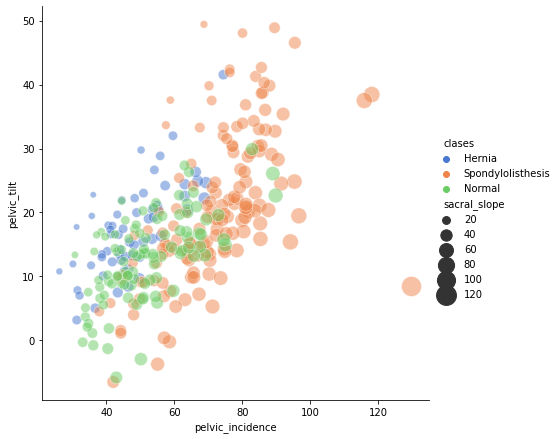

In [20]:
#@title **Vertebral Column dataset**
variable_x = "pelvic_incidence" #@param {type:"string"}
variable_y = "pelvic_tilt" #@param {type:"string"}
variable_s = "sacral_slope" #@param {type:"string"}

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data_h = pd.read_csv("data/column_3C.csv") 
print(data_h.shape)


sns.relplot(x=variable_x, y=variable_y, hue="clases", size=variable_s,
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=data_h);
            

data_h.head(3)

# **Ejercicio 2**  <a name="eje2"></a>

**Vamos a agregar DOS nuevas variables al dataframe**

Escriba una función que reciba el dataframe que contiene los datos de las enfermedades cardiacas (`data_h`). Entonces: 

- Defina una **NUEVA** variable con el nombre `acum`, que contenga la suma acumulativa de la variable `pelvic_radius`.

- Defina una **NUEVA** variable con el nombre `dist`. Para ello cree una distribución normal de la variable `lumbar_lordosis_angle`. Es decir una distribución normal con la media y desviación estandar de `lumbar_lordosis_angle`. Luego tome `310` valores aleatorios de esta distribución para llenar la nueva variable `dist`.

- Defina una **NUEVA** variable con el nombre `prod` que contenga el valor de la raiz del producto entre la variable `acum` y la variable `dist`.

- Retorne el dataframe con las nuevas variables. 

In [49]:
#@title **Escriba su código aquí!**
#@ markdown No modifique las dos últimas lineas

def fun_22261120(data_h):
    import numpy as np 
    import pandas as pd
    import scipy.stats as stats
    np.random.seed(23)




    data_h['acum'] = data_h['pelvic_radius'].cumsum()
    data_h['dist'] = stats.norm(data_h.lumbar_lordosis_angle.mean(), data_h.lumbar_lordosis_angle.std()).rvs(310) 
    data_h['sqprod'] = np.sqrt(data_h.dist*data_h.acum)
    

    return data_h

import urllib.parse, inspect
src22261120 = urllib.parse.quote_plus(inspect.getsource(fun_22261120))


,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,clases,acum,dist,sqprod
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia,98.672917,64.306269,79.657310
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia,213.078342,52.409867,105.675956
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia,319.063477,37.502929,109.388368
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia,420.931972,69.531942,171.079565
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia,529.100697,64.949793,185.377940


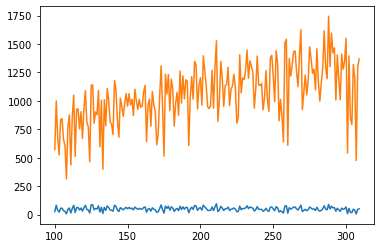

In [50]:
#@title **verifique su respuesta**
import numpy as np 
import pandas as pd
import seaborn as sns

data_h = pd.read_csv("data/column_3C.csv")
data_h = fun_22261120(data_h)
data_h.dist[100:].plot();
data_h.sqprod[100:].plot();

data_h.head()

In [48]:
#@title **Evalue su respuesta.**
!./run CHECK_SOLUTION PQ1_22261120 $src22261120

(310, 10)
18159.463504461306 18159.463504461306
51.238630336695046 51.238630336695046
888.2813059455827 888.2813059455827
evaluation result CORRECT


# **Ejercicio 3**  <a name="eje3"></a>

**Visualizar con boxplots e histogramas en 3D**

Ahora vamos a visualizar cada una de las variables de nuestro dataset utilizando graficos de tipo "boxplot" e histogramas en **3D**. Para ello vamos a crear una función que: 
- Reciba un dataframe `data_h`
- Realice un gráfico `boxplot` donde en el eje $x$ tengamos las variables `sacral_slope`, `pelvic_tilt`, `degree_spondylolisthesis`.
- Estime un histograma en 3D (bar3d), donde en el eje $x$ tengamos la variable `sacral_slope`, en el eje $y$ a la variable `pelvic_tilt`, en los parámetros: `bottom=0`, `width=1` y `depth=1`, y en el parámetro `top` a la variable `degree_spondylolisthesis`. Además el parámetro `shade` debe tomar el valor `True`. 
- Calcule una lista `m` que contenga el promedio de las variables `sacral_slope`, `pelvic_tilt` y `degree_spondylolisthesis`
- Retorne una lista con el objeto `plt` y la lista `m`

Referencia boxplot: https://seaborn.pydata.org/generated/seaborn.boxplot.html

Referencia bar3d: https://matplotlib.org/stable/gallery/mplot3d/3d_bars.html

In [51]:
#@title **Escriba su código aquí!**
#@ markdown No modifique las dos últimas lineas

def fun_23261120(data_h):
    import numpy as np 
    import pandas as pd
    import scipy.stats as stats
    import matplotlib.pyplot as plt
    import seaborn as sns

    m = np.array(data_h[{'sacral_slope', 'pelvic_tilt', 'degree_spondylolisthesis'}].mean())

    fig = plt.figure(figsize = (10, 5))
    ax1 = fig.add_subplot(121)
    plt = ax1.boxplot(x=np.array(data_h[{'sacral_slope','pelvic_tilt','degree_spondylolisthesis'}]))
    
    ax2 = fig.add_subplot(122, projection='3d')
    z=0
    plt = ax2.bar3d(x=data_h['sacral_slope'], y = data_h['pelvic_tilt'], z=data_h['degree_spondylolisthesis'], 
                    dx = 1, dy=1, dz=0, shade=True)


    return [plt, m]

import urllib.parse, inspect
src23261120 = urllib.parse.quote_plus(inspect.getsource(fun_23261120))

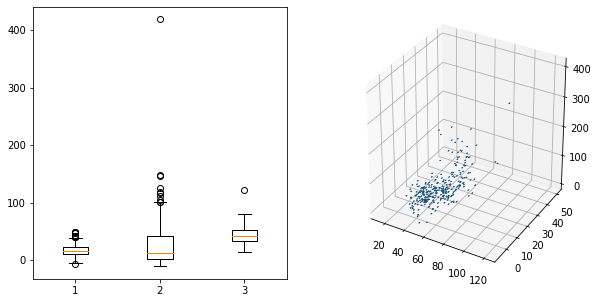

 array([17.54282196, 26.29669442, 42.95383097])]

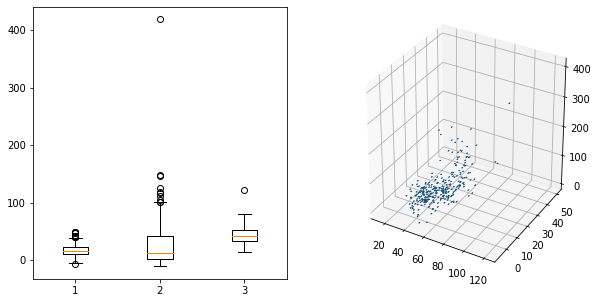

In [54]:
#@title **verifique su respuesta**
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data_h = pd.read_csv("data/column_3C.csv")
fun_23261120(data_h)

In [53]:
#@title **Evalue su respuesta.**
!./run CHECK_SOLUTION PQ1_23261120 $src23261120

evaluation result CORRECT


# **Ejercicio 4**  <a name="eje4"></a>


**Usamos CLT de forma EMPÍRICA**

Escriba una función que reciba el dataset `data_h`, y el valor  `N` para realizar el CLT de manera **empírica**. La función debe: 

- Calcular las distribuciones normales **solamente** para las variables: `["pelvic_tilt", "lumbar_lordosis_angle", "sacral_slope"]`

-  Discriminar las variables entre `enfermo` cuando `clases=="Spondylolisthesis"` y `sano` cuando `clases=="normal"`. Es decir, por cada variable considerada se obtendrán dos distribuciones.
<!--`(Seis en total)`-->

-  Retornar dos arreglos (`sano_array, enfe_array`), cada uno de los cuales contiene los 1000 experimentos realizados con `N` samples para las 3 variables.

- Retornar una lista `p_s` con los objetos `scipy` para las distribuciones normales que representan la población `normal`. 

- Retornar una lista `p_e` con los objetos `scipy` para las distribuciones normales que representan la población `enfermo`.







In [57]:
#@title **Escriba su código aquí!**
#@ markdown No modifique las dos últimas lineas

def fun_24261120(data_h, N):
  import numpy as np 
  import pandas as pd
  import scipy.stats as stats
  
  data_sel = data_h[["pelvic_tilt", "lumbar_lordosis_angle", "sacral_slope"]]
  data_sel_sano = data_h[data_h["clases"]=="normal"]
  data_sel_enfe  = data_h[data_h["clases"]=="Spondylolisthesis"]
  sano = []
  enfe = []
  for _ in range(1000):
    sano.append(np.mean(data_sel_sano.sample(N), axis=0))
    enfe.append(np.mean(data_sel_sano.sample(N), axis=0))
    

  


import urllib.parse, inspect
src24261120 = urllib.parse.quote_plus(inspect.getsource(fun_24261120))

In [58]:
#@title **verifique su respuesta**
N=2
sano, enfe, p_s, p_e = fun_24261120(data_h, N)

plt.figure(figsize=(10,3))
for i in range(3):
  plt.subplot(2,3, i+1)
  plt.hist(sano[:,i], bins=30, density=True, color='green');
  t = np.linspace(np.min(sano[:,i]), np.max(sano[:,i]), 100)
  plt.plot(t, p_s[i].pdf(t), color="black");
for i in range(3):
  plt.subplot(2,3, i+4)
  plt.hist(enfe[:,i], bins=30, density=True, color='red');
  t = np.linspace(np.min(enfe[:,i]), np.max(enfe[:,i]), 100)
  plt.plot(t, p_e[i].pdf(t),  color="black");


ValueError: ignored

In [ ]:
#@title **Evalue su respuesta.**
!./run CHECK_SOLUTION PQ1_24261120 $src24261120

# **Pasos Finales.**



#### 1. Reemplace la variable con su código de estudiante

In [63]:
#@title **1. Complete la siguiente información:**
taller_name = "quiz01" #@param {type:"string"}
codigo_name = "q01_2173051" #@param {type:"string"}


import urllib.parse, inspect
taller = urllib.parse.quote_plus(taller_name)
codigo = urllib.parse.quote_plus(codigo_name)

print(taller, codigo)

quiz01 q01_2173051


In [64]:
#@title **2. Guarde los cambios del taller**
%%javascript
require(["base/js/namespace"],function(Jupyter) {
    Jupyter.notebook.save_checkpoint();
});

<IPython.core.display.Javascript object>

In [65]:
#@title **3. Ejecute la siguiente celda y envíe el archivo**
!./convert_ipynb.sh $codigo $taller

uno: q01_2173051 dos quiz01
¡PERFECTO!, el archivo   'q01_2173051.ipynb'   se creó correctamente :D


---
<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/raw/master/imgs/bannerThanks.jpg" alt="Drawing" style="width:700px;"/>